In [31]:
# !pip install pdf2image
# !apt-get install poppler-utils
# !pip install fuzzywuzzy
# !python -m pip install paddlepaddle-gpu -i https://pypi.tuna.tsinghua.edu.cn/simple
# !pip install paddleocr==2.7.3
# !python3 -m pip install paddlepaddle==2.6.1 -i https://mirror.baidu.com/pypi/simple

In [ ]:
# !unzip Testing.zip

In [1]:
import numpy as np

from paddleocr import PaddleOCR

In [2]:
def paddle_to_easy(result):
  results = []
  for r in result[0]:
    temp = []
    temp.append(r[0])
    temp.append(r[1][0])
    temp.append(r[1][1])
    results.append(temp)
  return results

In [3]:
# import os
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [4]:
from paddleocr import PaddleOCR

ocr = PaddleOCR(det_model_dir="./models/det_inference", rec_model_dir="./models/rec_inference",use_angle_cls=False, lang='en')

[2024/04/29 18:15:13] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\bhanu/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\bhanu/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_len

In [7]:
img_path = "test.jpg"
result = ocr.ocr(img_path, cls=True)
results = paddle_to_easy(result)
results

[2024/04/29 18:24:06] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/04/29 18:24:06] ppocr DEBUG: dt_boxes num : 75, elapsed : 0.22823262214660645
[2024/04/29 18:24:20] ppocr DEBUG: rec_res num  : 75, elapsed : 13.441008567810059


[[[[60.0, 67.0], [233.0, 67.0], [233.0, 83.0], [60.0, 83.0]],
  'Telefax:91-866-2582672',
  0.971330463886261],
 [[[858.0, 58.0], [1050.0, 58.0], [1050.0, 75.0], [858.0, 75.0]],
  'Web:www.vrsiddhartha.ac.in',
  0.9723921418190002],
 [[[54.0, 88.0], [1058.0, 82.0], [1058.0, 110.0], [55.0, 117.0]],
  'VELAGAPUDI RAMAKRISHNA SIDDHARTHA ENGINEERING COLLEGE',
  0.971444308757782],
 [[[370.0, 123.0], [741.0, 120.0], [741.0, 143.0], [370.0, 147.0]],
  'VIJAYAWADA-520 007A.P.,INDIA.',
  0.919543445110321],
 [[[261.0, 150.0], [850.0, 143.0], [850.0, 167.0], [261.0, 173.0]],
  'Approved by AICTE,Accredited by NAAC withAGrade and ISO 9001: 2008 Certified',
  0.9362683296203613],
 [[[307.0, 170.0], [803.0, 165.0], [804.0, 187.0], [308.0, 192.0]],
  'An Autonomous College Affiliated to JNTUK.Kakinada 533 003.India',
  0.9431619644165039],
 [[[417.0, 202.0], [691.0, 202.0], [691.0, 223.0], [417.0, 223.0]],
  'STATEMENT OF GRADES',
  0.951214611530304],
 [[[780.0, 200.0], [982.0, 200.0], [982.0, 233

In [8]:
def preprocess_text_objects(results):
  filtered = results
  transformed = []
  merged = []

  for obj in filtered:
    center_x = sum([i[0] for i in obj[0]])//4
    center_y = sum([i[1] for i in obj[0]])//4
    height = max([abs(obj[0][0][1]-i[1]) for i in obj[0]])
    width = max([abs(obj[0][0][0]-i[0]) for i in obj[0]])
    transformed.append([[center_x,center_y,height,width],obj[1]])

  return transformed

preprocessed = preprocess_text_objects(results)
print(preprocessed)

[[[146.0, 75.0, 16.0, 173.0], 'Telefax:91-866-2582672'], [[954.0, 66.0, 17.0, 192.0], 'Web:www.vrsiddhartha.ac.in'], [[556.0, 99.0, 29.0, 1004.0], 'VELAGAPUDI RAMAKRISHNA SIDDHARTHA ENGINEERING COLLEGE'], [[555.0, 133.0, 24.0, 371.0], 'VIJAYAWADA-520 007A.P.,INDIA.'], [[555.0, 158.0, 23.0, 589.0], 'Approved by AICTE,Accredited by NAAC withAGrade and ISO 9001: 2008 Certified'], [[555.0, 178.0, 22.0, 497.0], 'An Autonomous College Affiliated to JNTUK.Kakinada 533 003.India'], [[554.0, 212.0, 21.0, 274.0], 'STATEMENT OF GRADES'], [[881.0, 216.0, 33.0, 202.0], 'Memo No.04239'], [[558.0, 248.0, 24.0, 316.0], 'B.TECH.DEGREE EXAMINATIONS'], [[780.0, 246.0, 18.0, 93.0], 'DEC2018'], [[290.0, 305.0, 29.0, 418.0], 'BRANCH:MECHANICAL ENGINEERING'], [[155.0, 359.0, 24.0, 146.0], 'SEMESTER:'], [[653.0, 357.0, 23.0, 148.0], 'REGULATION:'], [[774.0, 355.0, 24.0, 57.0], 'VR17'], [[92.0, 440.0, 24.0, 93.0], 'REGD.NO.'], [[368.0, 442.0, 25.0, 129.0], '188W1A0394'], [[707.0, 435.0, 23.0, 136.0], 'AADHAAR 

In [9]:
def process_horizontal(results, size=1600):
  y = size/110
  horizontal=[]
  i=0

  unique_results = []
  seen_rectangles = []
  for rectangle, text in results:
      rectangle_key = tuple(rectangle)
      if rectangle_key not in seen_rectangles:
          unique_results.append([rectangle, text])
          seen_rectangles.append(rectangle_key)
  results = unique_results
  results=sorted(results, key=lambda x: (x[0][1], x[0][0]))

  while i<len(results):
    result=results[i]
    temp=[]
    k=0
    for j in results[i:]:
      if abs(result[0][1]-j[0][1])<=y:
        temp.append(j)
        k+=1
    i+=k
    temp=sorted(temp, key=lambda x:x[0])
    horizontal.append(temp)
  return horizontal

preprocessed_x = process_horizontal(preprocessed)
preprocessed_x[14]

[[[154.0, 636.0, 18.0, 91.0], '17MA1101'],
 [[480.0, 632.0, 21.0, 342.0], 'MATRICES AND DIFFERENTIAL CALCULUS'],
 [[900.0, 632.0, 21.0, 31.0], '4.0'],
 [[1014.0, 632.0, 21.0, 28.0], 'Ex']]

In [10]:
# !pip install fuzzywuzzy

import re
from fuzzywuzzy import fuzz

def find_text_bounding_box(data, target_words):
    bounding_boxes = []

    for item in data:
        text = item[1]
        bbox = item[0]
        text_lower = text.lower()

        for target_word in target_words:
            regex_pattern = re.compile(rf"\b\w{{0,{len(target_word)+1}}}{re.escape(target_word)}\w{{0,{len(target_word)+1}}}\b", re.IGNORECASE)
            if regex_pattern.search(text_lower):
                bounding_boxes.append([bbox, text])
                break
            if len(target_word) - 1 <= len(text_lower) <= len(target_word) + 1:
                if fuzz.partial_ratio(target_word, text_lower) > 85:
                    bounding_boxes.append([bbox, text])
                    break

    return bounding_boxes

target_words = ["course","title","grade","subject","credits","result","marks", "code", "total", "internal",'s.no']
header_boxes = find_text_bounding_box(preprocessed, target_words)

header_boxes

[[[555.0, 158.0, 23.0, 589.0],
  'Approved by AICTE,Accredited by NAAC withAGrade and ISO 9001: 2008 Certified'],
 [[554.0, 212.0, 21.0, 274.0], 'STATEMENT OF GRADES'],
 [[161.0, 577.0, 19.0, 124.0], 'COURSE CODE'],
 [[555.0, 575.0, 23.0, 195.0], 'TITLE OF THE COURSE'],
 [[892.0, 571.0, 23.0, 83.0], 'CREDITS'],
 [[1004.0, 572.0, 19.0, 65.0], 'GRADE']]

In [11]:
from statistics import mode, mean

def search_headers(results, headers):
  idx_list = []
  for header in headers:
    for i in range(len(results)):
      result = results[i]
      lst = [res[1] for res in result]
      if header[1] in lst:
        idx_list.append(i)
  idx = mode(idx_list)
  return idx,results[idx]

search_headers(preprocessed_x, header_boxes)

(13,
 [[[161.0, 577.0, 19.0, 124.0], 'COURSE CODE'],
  [[555.0, 575.0, 23.0, 195.0], 'TITLE OF THE COURSE'],
  [[892.0, 571.0, 23.0, 83.0], 'CREDITS'],
  [[1004.0, 572.0, 19.0, 65.0], 'GRADE']])

In [12]:
def is_overlapping(rect1, rect2):
    rect1_left = rect1[0] - rect1[3] / 2
    rect1_right = rect1[0] + rect1[3] / 2
    rect2_left = rect2[0] - rect2[3] / 2
    rect2_right = rect2[0] + rect2[3] / 2

    if rect1_left <= rect2_right and rect1_right >= rect2_left:
        return True, min(rect1_right-rect2_left,rect2_right-rect1_left)
    elif rect2_left <= rect1_right and rect2_right >= rect1_left:
        return True, min(rect1_right-rect2_left,rect2_right-rect1_left)
    elif rect1_left >= rect2_right and rect1_right >= rect2_left:
        return False, abs(rect2_right - rect1_left)
    elif rect2_left >= rect1_right and rect2_right >= rect1_left:
        return False, abs(rect1_right-rect2_left)
    else:
        return False, 1000


rect_1 = [100, 100, 25, 25]
rect_2 = [100, 100, 50, 50]

is_overlapping(rect_1, rect_2)

(True, 37.5)

In [13]:
import pandas as pd

def extract_df(preprocessed_x, probable_headers):
  idx, headers = search_headers(preprocessed_x, probable_headers)

  headers = sorted(headers, key=lambda x: x[0][0])

  header_names = [header[1] for header in headers]

  df = pd.DataFrame(columns=header_names)

  prev_y = mean([header[0][1] for header in headers])
  prev_dist = float('inf')

  analyze_text = preprocessed_x[idx+1:]

  data = []
  for text in analyze_text:
    y = mean([int(i[0][1]) for i in text])
    dist = y - prev_y
    if dist>=2*prev_dist:
      break
    temp = {}
    min_temp = {}
    assigned = []
    closest = {col[1]:[float("inf"), ""] for col in headers}
    for col in headers:
      for item in text:
        if is_overlapping(col[0],item[0])[0]:
          temp[col[1]]=item[1]
          closest[col[1]]=[0,item[1]]
          assigned.append(item[1])
          break
        if is_overlapping(col[0],item[0])[1]<closest[col[1]][0]:
          closest[col[1]]=[is_overlapping(col[0],item[0])[1],item[1]]

    min_values = {}
    for key, value in closest.items():
        if value[1] in min_values:
            if value[0] < min_values[value[1]][0]:
                min_values[value[1]] = (value[0], key)
        else:
            min_values[value[1]] = (value[0], key)
    closest = {min_key: closest[min_key] for _, min_key in min_values.values()}

    for key in closest.keys():
      if closest[key][1] not in assigned:
        temp[key]=closest[key][1]



    data.append(temp)
    prev_y = y
    prev_dist = dist


  dfs = [pd.DataFrame([row_data], columns=header_names) for row_data in data]
  df = pd.concat(dfs, ignore_index=True)

  return df

extract_df(preprocessed_x, header_boxes)

COURSE CODE                 TITLE OF THE COURSE       CREDITS         GRADE
0    17MA1101  MATRICES AND DIFFERENTIAL CALCULUS           4.0            Ex
1   17CH1102A               ENGINEERING CHEMISTRY           3.0            Ex
2    17CS1103             PROBLEM SOLVING METHODS           3.0            A+
3   17ME1104A             ENGINEERING MECHANICS-1           3.0            Ex
4    17ME1105                ENGINEERING GRAPHICS           4.0            A+
5   17MC1106B  PROFESSIONAL ETHICS & HUMAN VALUES           NaN            A+
6   *17MC1107                  INDUCTION PROGRAME  SATISFACTORY  SATISFACTORY
7    17CH1151           ENGINEERING CHEMISTRY LAB           1.5            Ex
8    17CS1152       COMPUTING AND PERIPHERALS LAB           1.0            Ex

In [14]:
from PIL import Image, ImageDraw

image = Image.open(img_path)

def draw_boxes(image, results):
    draw = ImageDraw.Draw(image)
    for result in results:
        x_center, y_center, height, width = result[0]
        x_min = x_center - width / 2
        y_min = y_center - height / 2
        x_max = x_center + width / 2
        y_max = y_center + height / 2
        draw.rectangle([x_min, y_min, x_max, y_max], outline=(0, 255, 0), width=2)
    return image


filtered = [obj for obj in results if obj[2] >= 0.5]

In [15]:
def format_text_to_dataframe(results, target_words, size):
  preprocessed = preprocess_text_objects(results)

  preprocessed_x = process_horizontal(preprocessed, size)
  header_boxes=find_text_bounding_box(preprocessed, target_words)

  df = extract_df(preprocessed_x, header_boxes)
  return df

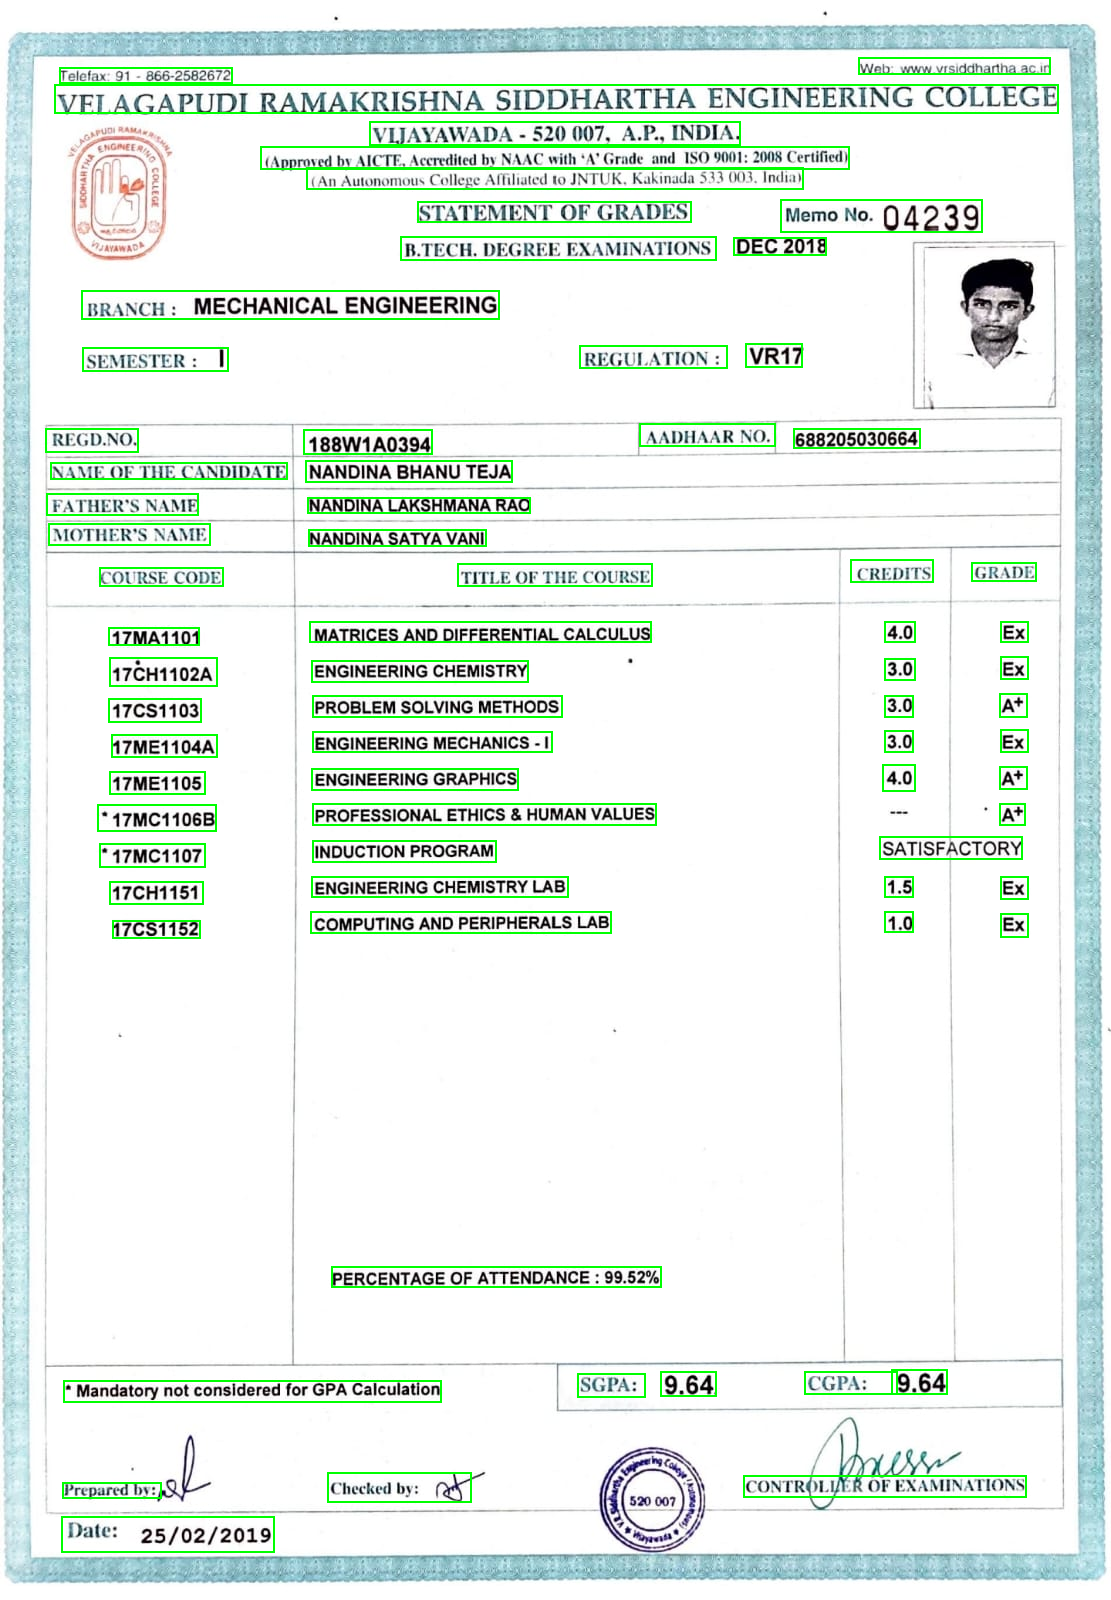

In [16]:
draw_boxes(image, preprocess_text_objects(results))

In [17]:
def header_overlap(header_boxes, results, tolerence=10):
  overlaps = []
  for header in header_boxes:
    overlaps.append([header])

    for result in results:
      header_t = header[0][1]-(header[0][2]/2)
      header_b = header[0][1]+(header[0][2]/2)
      result_t = result[0][1]-(result[0][2]/2)
      result_b = result[0][1]+(result[0][2]/2)
      if header_t-result_b<tolerence and result_t<header_b and is_overlapping(header[0],result[0])[0] and is_overlapping(header[0],result[0])[1]>20 and result!=header:
        overlaps[-1].append(result)
      elif header_t<result_b and result_t-header_b<tolerence and is_overlapping(header[0],result[0])[0] and is_overlapping(header[0],result[0])[1]>20 and result!=header:
        overlaps[-1].append(result)

  print(overlaps)
  processed_headers = []
  for overlap in overlaps:
    min_x = float('inf')
    max_x = float('-inf')
    min_y = float('inf')
    max_y = float('-inf')

    text = ""
    for rect, txt in overlap:
        center_x, center_y, height, width = rect
        x1 = center_x - width/2
        x2 = center_x + width/2
        y1 = center_y - height/2
        y2 = center_y + height/2

        min_x = min(min_x, x1)
        max_x = max(max_x, x2)
        min_y = min(min_y, y1)
        max_y = max(max_y, y2)

        text = text+" "+txt

    bounding_rect = [(min_x+max_x)/2, (min_y+max_y)/2, max_y - min_y, max_x - min_x]
    processed_headers.append([bounding_rect, text])

  seen_first_elements = []
  final_headers = []
  for sublist in processed_headers:
      first_element = sublist[0]
      if first_element not in seen_first_elements:
          final_headers.append(sublist)
          seen_first_elements.append(first_element)
  sorted_headers = sorted(final_headers, key=lambda x: x[0][0])
  return sorted_headers

headers = header_overlap(search_headers(preprocessed_x,header_boxes)[1], preprocessed, image.size[1]/250)

[[[[161.0, 577.0, 19.0, 124.0], 'COURSE CODE']], [[[555.0, 575.0, 23.0, 195.0], 'TITLE OF THE COURSE']], [[[892.0, 571.0, 23.0, 83.0], 'CREDITS']], [[[1004.0, 572.0, 19.0, 65.0], 'GRADE']]]


In [18]:
def process_results(results, headers):
  def is_inside(rect1, rect2):
      x1, y1, h1, w1 = rect1
      x2, y2, h2, w2 = rect2
      return x1-(w1/2) >= x2-(w2/2) and y1-(h1/2) >= y2-(h2/2) and x1 + (w1/2) <= x2 + (w2/2) and y1 + (h1/2) <= y2 + (h2/2)

  final_results = []

  for result_rect, result_text in results:
      is_inside_header = False
      for header_rect, header_text in headers:
          if is_inside(result_rect, header_rect):
              final_results.append([header_rect, header_text])
              is_inside_header = True
              break
      if not is_inside_header:
          final_results.append([result_rect, result_text])
  return final_results

processed_results = process_results(preprocessed, headers)

In [19]:
preprocessed_x = process_horizontal(processed_results)

headers = search_headers(preprocessed_x, headers)

In [20]:
df = extract_df(preprocessed_x, headers)

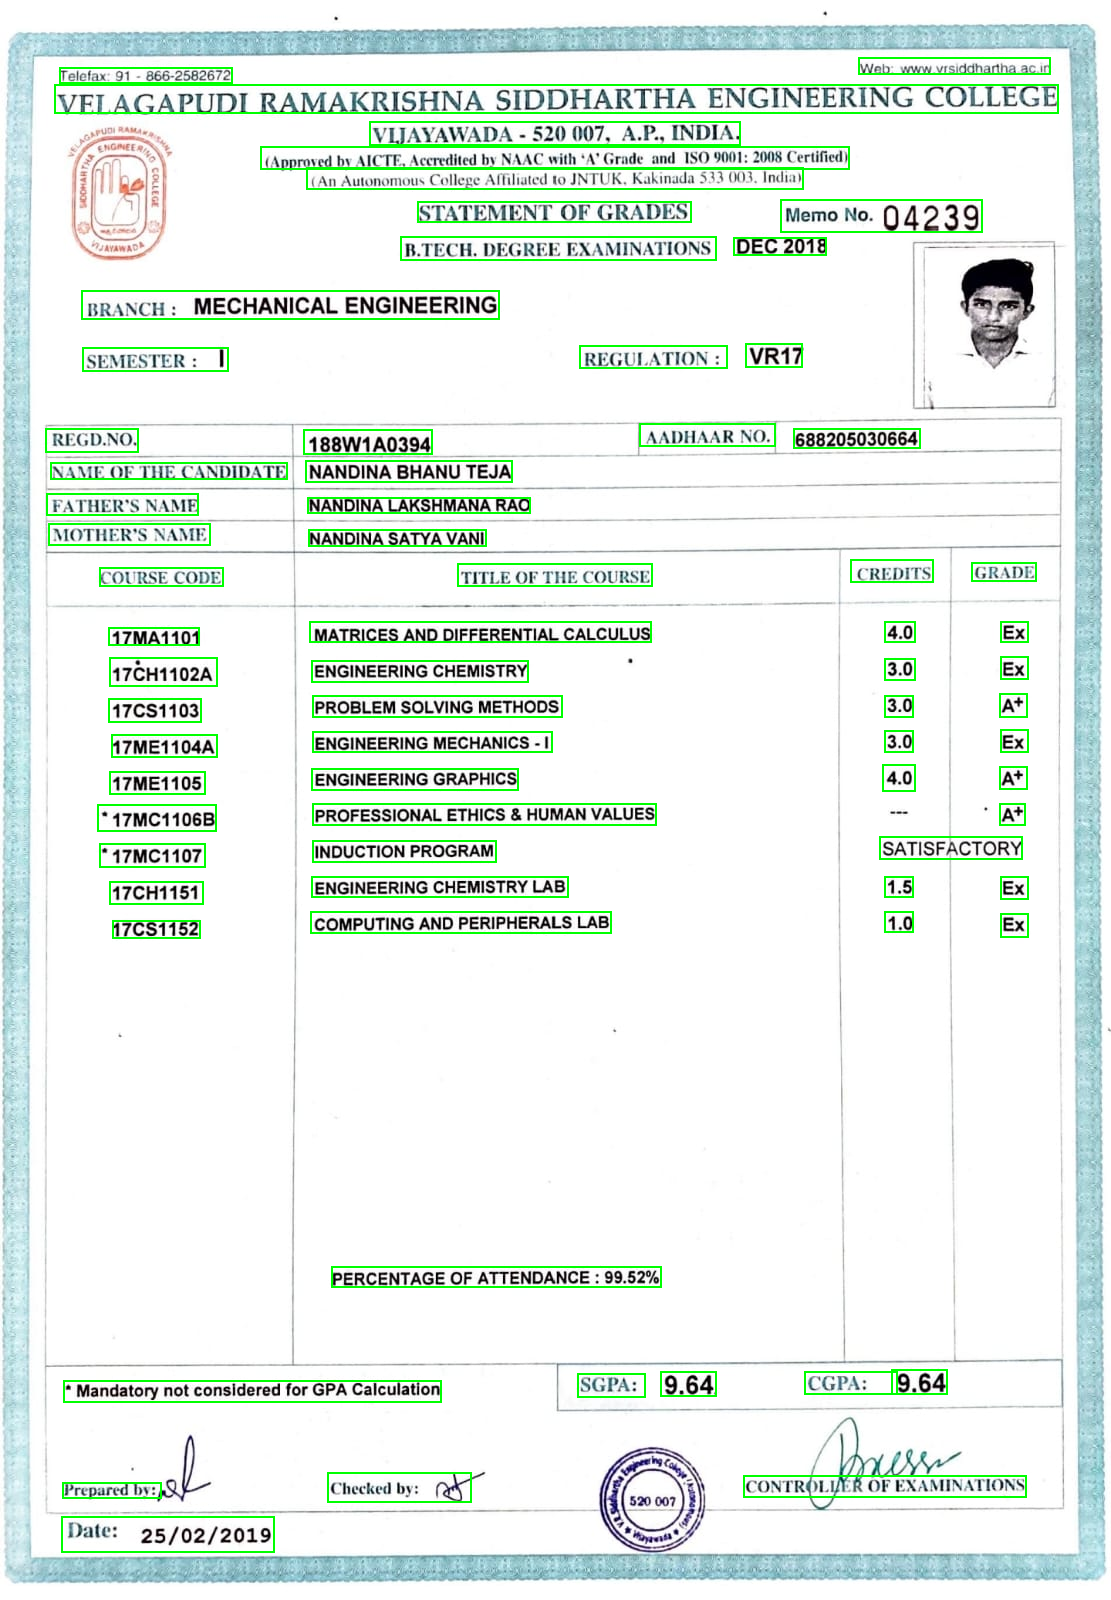

In [21]:
image = Image.open(img_path)
draw_boxes(image, processed_results)

In [22]:
def process_df(df):
    columns = list(df.columns)
    relations = []
    for i in range(len(columns)-1):
        test_cols = columns[i+1:]
        ref=columns[i]
        for test in test_cols:
            relationship_exists = all((df[ref] == df[test]) | (df[[ref, test]].isnull().any(axis=1)))
            if relationship_exists:
                relations.append([ref,test])

    drop_cols=set()
    for relation in relations:
      name = ' '.join(relation)
      df[name] = df.apply(lambda row: row[relation[0]] if row[relation[0]] == row[relation[1]] else row[relation[0]] + row[relation[1]] if pd.notnull(row[relation[0]]) and pd.notnull(row[relation[1]]) else row[relation[0]] if pd.notnull(row[relation[0]]) else row[relation[1]], axis=1)
      i = min(columns.index(relation[0]), columns.index(relation[1]))
      columns.insert(i, name)
      df = df[columns]
      drop_cols.update(relation)
    df.drop(list(drop_cols), axis=1, inplace=True)
    return df

In [23]:
df

COURSE CODE                 TITLE OF THE COURSE       CREDITS         GRADE
0     17MA1101  MATRICES AND DIFFERENTIAL CALCULUS           4.0            Ex
1    17CH1102A               ENGINEERING CHEMISTRY           3.0            Ex
2     17CS1103             PROBLEM SOLVING METHODS           3.0            A+
3    17ME1104A             ENGINEERING MECHANICS-1           3.0            Ex
4     17ME1105                ENGINEERING GRAPHICS           4.0            A+
5    17MC1106B  PROFESSIONAL ETHICS & HUMAN VALUES           NaN            A+
6    *17MC1107                  INDUCTION PROGRAME  SATISFACTORY  SATISFACTORY
7     17CH1151           ENGINEERING CHEMISTRY LAB           1.5            Ex
8     17CS1152       COMPUTING AND PERIPHERALS LAB           1.0            Ex

In [24]:
def find_target_box(data, target_words, non_target_words=[]):
    bounding_boxes = []

    for item in data:
        text = item[1]
        bbox = item[0]
        text_lower = text.lower()

        non_target_present = any(re.search(rf"\b{re.escape(word)}\b", text_lower) for word in non_target_words)
        if non_target_present:
            continue
        for target_word in target_words:
            regex_pattern = re.compile(rf"\b\w{{0,{len(target_word)+1}}}{re.escape(target_word)}\w{{0,{len(target_word)+1}}}\b", re.IGNORECASE)
            if regex_pattern.search(text_lower):
                bounding_boxes.append([bbox, text])
                break
            if len(target_word) - 1 <= len(text_lower) <= len(target_word) + 1:
                if fuzz.partial_ratio(target_word, text_lower) > 85:
                    bounding_boxes.append([bbox, text])
                    break
    return bounding_boxes

def find_next(horizontal, target):
    for line in horizontal:
        if target in line:
            return line[line.index(target)+1]
    return ""

In [28]:
def get_fields(preprocessed_x, processed_results):

    target_name = ["name", "student", "candidate"]
    non_target_name = ["course","father","mother"]

    target_university = ['university',"college"]

    target_course = ['computer', 'mechanical','civil',"electronics", "electrical",'department',"artificial","intelligence","engineering"]
    non_target_course = ['institute','college','university']

    target_gpa=['cgpa','sgpa','gpa']
    non_target_gpa = []

    name_field = find_target_box(processed_results, target_name, non_target_name)[0]

    name = name_field[1]

    if len(name.split(" "))>4:
        name_list=name.split(" ")
        id = list([0])
        for target in target_name:
            i = name.find(target)
            if i>-1:
                id.append(i+len(target))
        name = name[max(id):]

    else:
        name = find_next(preprocessed_x,name_field)[1]

    university= find_target_box(processed_results, target_university)[0][1]

    branch= find_target_box(processed_results, target_course, non_target_course)[0][1]
    if ":" in branch:
        branch=branch[branch.index(":")+1:]

    gpa_fields = find_target_box(processed_results, target_gpa)
    gpa_fields = [txt for txt in gpa_fields if len(txt[1].split(" "))<3]
    gpas = {}
    for i in gpa_fields:
        gpas[i[1]] = find_next(preprocessed_x, i)[1]

    return name, university, branch, gpas


In [29]:
name, university, branch, gpas = get_fields(preprocessed_x, processed_results)
data = df.to_dict()

json_data = {
    "name":name,
    "university":university,
    "course":branch,
    "course table":data,
    "gpas":gpas
}

In [30]:
json_data

{'name': 'NANDINA BHANU TEJA',
 'university': 'VELAGAPUDI RAMAKRISHNA SIDDHARTHA ENGINEERING COLLEGE',
 'course': 'MECHANICAL ENGINEERING',
 'course table': {' COURSE CODE': {0: '17MA1101',
   1: '17CH1102A',
   2: '17CS1103',
   3: '17ME1104A',
   4: '17ME1105',
   5: '17MC1106B',
   6: '*17MC1107',
   7: '17CH1151',
   8: '17CS1152'},
  ' TITLE OF THE COURSE': {0: 'MATRICES AND DIFFERENTIAL CALCULUS',
   1: 'ENGINEERING CHEMISTRY',
   2: 'PROBLEM SOLVING METHODS',
   3: 'ENGINEERING MECHANICS-1',
   4: 'ENGINEERING GRAPHICS',
   5: 'PROFESSIONAL ETHICS & HUMAN VALUES',
   6: 'INDUCTION PROGRAME',
   7: 'ENGINEERING CHEMISTRY LAB',
   8: 'COMPUTING AND PERIPHERALS LAB'},
  ' CREDITS': {0: '4.0',
   1: '3.0',
   2: '3.0',
   3: '3.0',
   4: '4.0',
   5: nan,
   6: 'SATISFACTORY',
   7: '1.5',
   8: '1.0'},
  ' GRADE': {0: 'Ex',
   1: 'Ex',
   2: 'A+',
   3: 'Ex',
   4: 'A+',
   5: 'A+',
   6: 'SATISFACTORY',
   7: 'Ex',
   8: 'Ex'}},
 'gpas': {'SGPA:': '9.64', 'CGPA': '9.64'}}

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

from utils import TranscriptOCR

transcriptocr = TranscriptOCR()

[2024/04/21 22:42:18] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\bhanu/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\bhanu/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_len

[2024/04/21 22:42:33] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/04/21 22:42:33] ppocr DEBUG: dt_boxes num : 75, elapsed : 0.2812154293060303
[2024/04/21 22:42:45] ppocr DEBUG: rec_res num  : 75, elapsed : 11.445902347564697


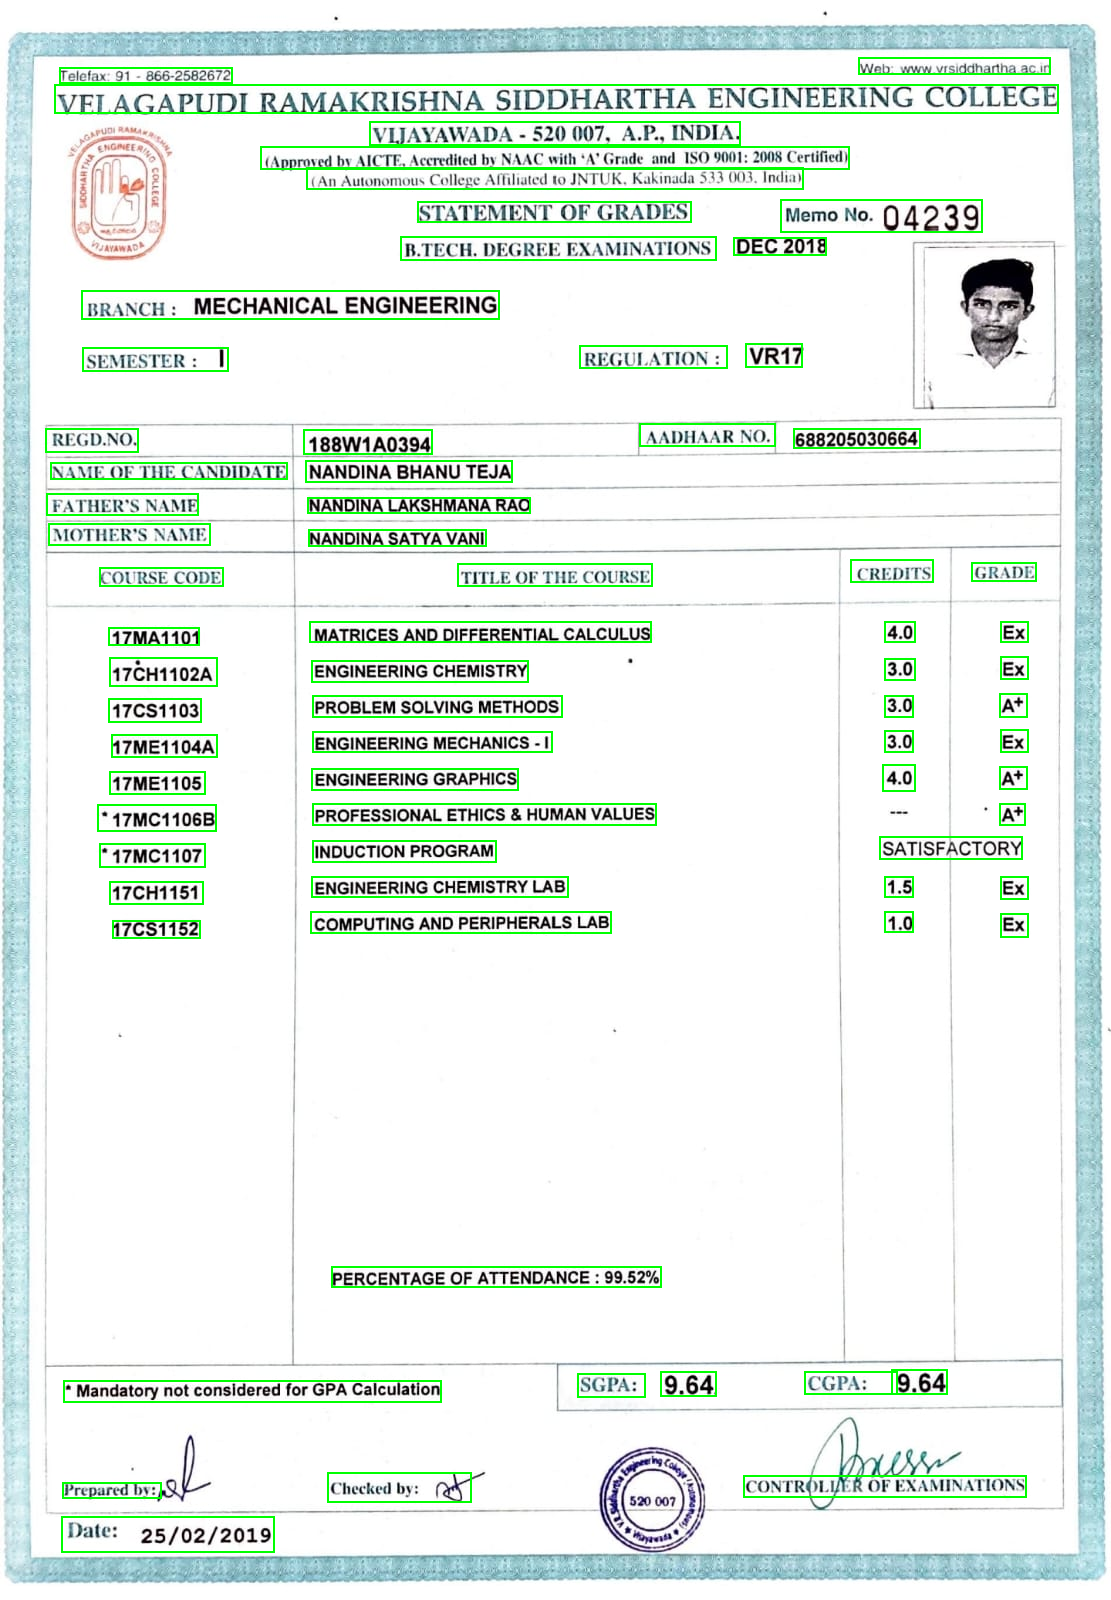

In [4]:
transcriptocr.draw_boxes('test.jpg')

In [3]:
transcriptocr.extract_json('test.jpg')

[2024/04/21 22:42:20] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


[2024/04/21 22:42:21] ppocr DEBUG: dt_boxes num : 75, elapsed : 1.254380226135254
[2024/04/21 22:42:33] ppocr DEBUG: rec_res num  : 75, elapsed : 11.585350751876831


{'name': 'NANDINA BHANU TEJA',
 'university': 'VELAGAPUDI RAMAKRISHNA SIDDHARTHA ENGINEERING COLLEGE',
 'course': 'BRANCH:MECHANICAL ENGINEERING',
 'course table': {' COURSE CODE': {0: '17MA1101',
   1: '17CH1102A',
   2: '17CS1103',
   3: '17ME1104A',
   4: '17ME1105',
   5: '17MC1106B',
   6: '*17MC1107',
   7: '17CH1151',
   8: '17CS1152'},
  ' TITLE OF THE COURSE': {0: 'MATRICES AND DIFFERENTIAL CALCULUS',
   1: 'ENGINEERING CHEMISTRY',
   2: 'PROBLEM SOLVING METHODS',
   3: 'ENGINEERING MECHANICS-1',
   4: 'ENGINEERING GRAPHICS',
   5: 'PROFESSIONAL ETHICS & HUMAN VALUES',
   6: 'INDUCTION PROGRAME',
   7: 'ENGINEERING CHEMISTRY LAB',
   8: 'COMPUTING AND PERIPHERALS LAB'},
  ' CREDITS': {0: '4.0',
   1: '3.0',
   2: '3.0',
   3: '3.0',
   4: '4.0',
   5: nan,
   6: 'SATISFACTORY',
   7: '1.5',
   8: '1.0'},
  ' GRADE': {0: 'Ex',
   1: 'Ex',
   2: 'A+',
   3: 'Ex',
   4: 'A+',
   5: 'A+',
   6: 'SATISFACTORY',
   7: 'Ex',
   8: 'Ex'}},
 'gpas': {'SGPA:': '9.64', 'CGPA': '9.64'}}